In [77]:
import yfinance as yf

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [79]:
df=yf.download("AAPL",start="2010-01-01",end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [80]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505279,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [81]:
df["Close"]

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [82]:
# setting data
df=df["Close"].to_frame() # conver to dataframe s
df.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [83]:
df["Close"].shift(2)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06     7.643214
2010-01-07     7.656429
2010-01-08     7.534643
                ...    
2019-12-23    70.004997
2019-12-24    69.860001
2019-12-26    71.000000
2019-12-27    71.067497
2019-12-30    72.477501
Name: Close, Length: 2515, dtype: float64

In [84]:
df["Close"].shift(-1)

Date
2010-01-04     7.656429
2010-01-05     7.534643
2010-01-06     7.520714
2010-01-07     7.570714
2010-01-08     7.503929
                ...    
2019-12-23    71.067497
2019-12-24    72.477501
2019-12-26    72.449997
2019-12-27    72.879997
2019-12-30          NaN
Name: Close, Length: 2515, dtype: float64

In [85]:
# sliding window


In [86]:
df["Close in 10 Changes "]=df["Close"].shift(-10) # for 10 changes

In [87]:
df.head(20)

,Close,Close in 10 Changes
Date,,
2010-01-04,7.643214,7.680000
2010-01-05,7.656429,7.561786
2010-01-06,7.534643,7.431071
2010-01-07,7.520714,7.062500
2010-01-08,7.570714,7.252500
2010-01-11,7.503929,7.355000
2010-01-12,7.418571,7.424286
2010-01-13,7.523214,7.117500
2010-01-14,7.479643,6.859286


In [88]:
df.tail(20)

,Close,Close in 10 Changes
Date,,
2019-12-02,66.040001,69.964996
2019-12-03,64.862503,70.102501
2019-12-04,65.434998,69.934998
2019-12-05,66.394997,70.004997
2019-12-06,67.677498,69.860001
2019-12-09,66.730003,71.000000
2019-12-10,67.120003,71.067497
2019-12-11,67.692497,72.477501
2019-12-12,67.864998,72.449997


In [89]:
dfc=df.iloc[:-10]

In [90]:
dfc.head()

,Close,Close in 10 Changes
Date,,
2010-01-04,7.643214,7.680000
2010-01-05,7.656429,7.561786
2010-01-06,7.534643,7.431071
2010-01-07,7.520714,7.062500
2010-01-08,7.570714,7.252500


In [91]:
dfc.reset_index(inplace=True)

In [114]:
dfc.head()

,Date,Close,Close in 10 Changes
0,2010-01-04,7.643214,7.680000
1,2010-01-05,7.656429,7.561786
2,2010-01-06,7.534643,7.431071
3,2010-01-07,7.520714,7.062500
4,2010-01-08,7.570714,7.252500


In [93]:
x=dfc.iloc[:,1].values
y=dfc.iloc[:,2].values

In [94]:
y

array([ 7.67999983,  7.56178617,  7.4310708 , ..., 72.47750092,
       72.44999695, 72.87999725])

In [95]:
x # this is one dimentional arrray this showuld be converted into 2D array 

array([ 7.64321423,  7.65642881,  7.53464317, ..., 67.69249725,
       67.86499786, 68.78749847])

In [96]:
dfc.shape

(2505, 3)

In [97]:
(dfc.shape[0],1)

(2505, 1)

In [101]:
x=dfc.iloc[:,1].values.reshape(dfc.shape[0],1)

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [103]:
rf=RandomForestRegressor(n_estimators=500)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [104]:
y_pred=rf.predict(x_test)

In [105]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.8041013566101014

In [ ]:
#forcasting 

In [118]:
y_act_10=dfc.iloc[-10:,:]["Close in 10 Changes "].values        # from -10 to end 
y_act_10

array([69.96499634, 70.10250092, 69.93499756, 70.00499725, 69.86000061,
       71.        , 71.06749725, 72.47750092, 72.44999695, 72.87999725])

In [123]:
y_pred_10=rf.predict(dfc.iloc[-10:,:]["Close"].values.reshape(10,1))
y_pred_10

array([67.34573282, 68.68484116, 66.66203223, 67.4183689 , 70.63218518,
       69.37268546, 69.89768797, 71.74724031, 72.19857814, 72.6111176 ])

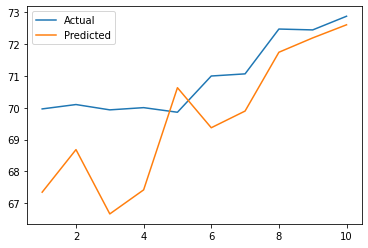

In [124]:
plt.plot(range(1,11),y_act_10)
plt.plot(range(1,11),y_pred_10)
plt.legend(["Actual","Predicted"])
plt.show()